In [1]:
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from glob import glob
import matplotlib.pyplot as plt

In [2]:
test_data_path = 'ALL TVT/test' #path of the test data
img_width, img_height = 224, 224

files = glob('ALL TVT/test/all_benign/*') #get all the file name for all_benign class

test_generator = ImageDataGenerator()

test_data_generator = test_generator.flow_from_directory(
    test_data_path, # Put your path here
     target_size=(img_width, img_height),
     batch_size=64,
    shuffle=False)

Found 2006 images belonging to 4 classes.


In [3]:
#show the mapping of the classes
for cls, idx in test_data_generator.class_indices.items():
    print(f'Class: {cls} | Index: {idx}')

model = keras.models.load_model('MobileNet.h5')

Class: all_benign | Index: 0
Class: all_early | Index: 1
Class: all_pre | Index: 2
Class: all_pro | Index: 3


32/32 [==============================] - 27s 832ms/step


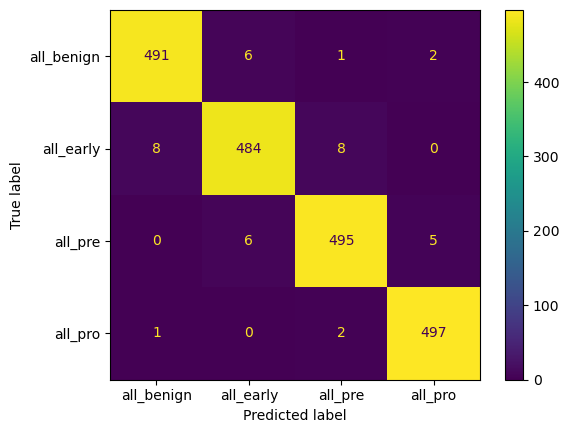

In [4]:
#display the confusion matrix
predictions = model.predict(test_data_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())
cm = confusion_matrix(true_classes, predicted_classes);
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels);
disp.plot();

In [5]:
def make_predictions(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    
    predictions = model.predict(img_array_expanded_dims, verbose=0) 
    predicted_class = np.argmax(predictions[0]) #index of the class with the highest probability
    
    print('Image:')
    plt.imshow(img) # display the image
    plt.show()
    print('True Class: ', image_path.split('/')[-1])
    print(f'Predicted Class: {class_labels[predicted_class]}')
    print('-------------------------------------------')

Image:


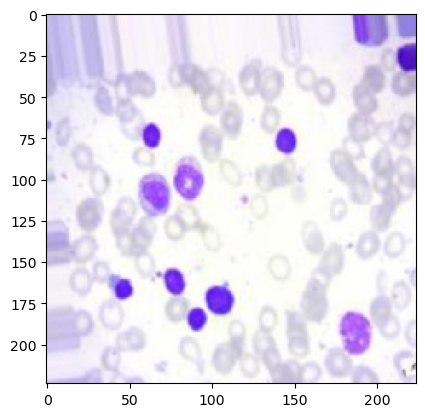

True Class:  all_benign\all_benign_0004.jpg
Predicted Class: all_benign
-------------------------------------------
Image:


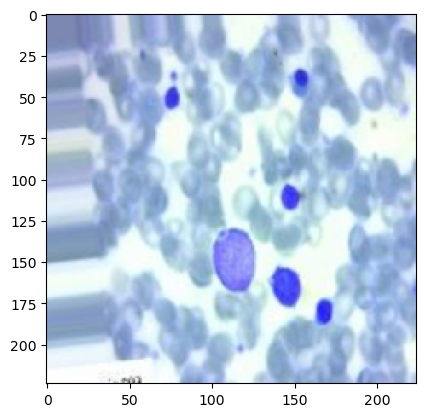

True Class:  all_benign\all_benign_0005.jpg
Predicted Class: all_benign
-------------------------------------------
Image:


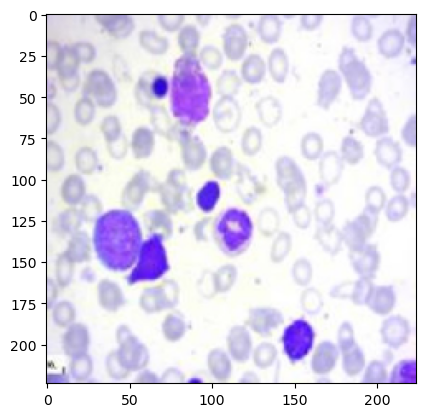

True Class:  all_benign\all_benign_0014.jpg
Predicted Class: all_benign
-------------------------------------------


In [6]:
for file in files[:3]: #make predictions for the first 3 images in the all_benign folder
    make_predictions(file)